In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pytrends.request import TrendReq

In [26]:
pytrends = TrendReq(hl='en-US', tz=-330, geo='IN')

In [27]:
timeframe_dict = {
    'year_start': 2018,
    'month_start': 1,
    'day_start': 1,
    'hour_start': 0,
    'year_end': 2019, 
    'month_end': 11,
    'day_end': 1,
    'hour_end': 0
}

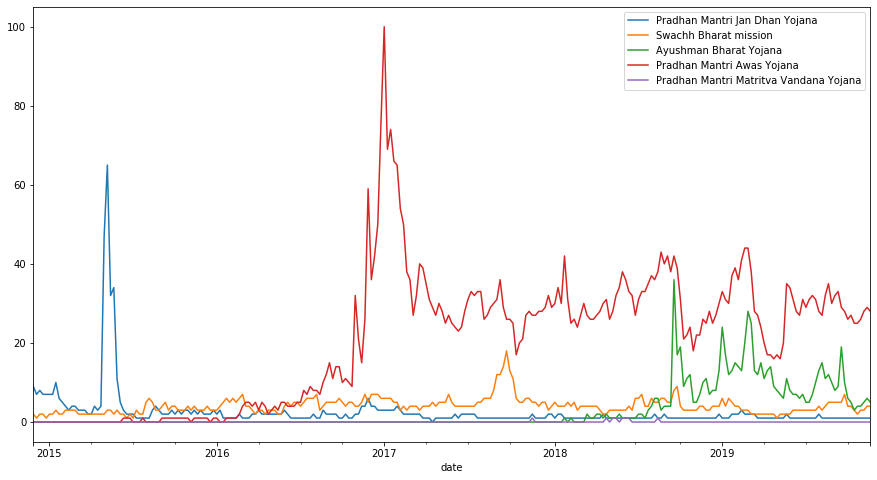

In [7]:
kw_list = ["Pradhan Mantri Jan Dhan Yojana", 
           "Swachh Bharat mission",
           "Ayushman Bharat Yojana",
           "Pradhan Mantri Awas Yojana",
           "Pradhan Mantri Matritva Vandana Yojana",
          ]

pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', gprop='')
df = pytrends.interest_over_time()
#     csv_name = kw.lower().replace(" ", "_") + ".csv"
#     df.to_csv(csv_name)
df[kw_list].plot(figsize=(15, 8))

In [28]:
df2 = pytrends.get_historical_interest(kw_list, **timeframe_dict)
df2.head()

HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)


,Pradhan Mantri Jan Dhan Yojana,Swachh Bharat mission,Ayushman Bharat Yojana,Pradhan Mantri Awas Yojana,Pradhan Mantri Matritva Vandana Yojana,isPartial
date,,,,,,
2018-01-01 00:00:00,3,7,0,25,0,False
2018-01-01 01:00:00,1,2,0,22,0,False
2018-01-01 02:00:00,1,6,0,45,0,False
2018-01-01 03:00:00,3,3,0,43,0,False
2018-01-01 04:00:00,0,9,0,47,0,False


In [36]:
df2.reset_index(inplace=True)
df2.head()

,date,Pradhan Mantri Jan Dhan Yojana,Swachh Bharat mission,Ayushman Bharat Yojana,Pradhan Mantri Awas Yojana,Pradhan Mantri Matritva Vandana Yojana,isPartial
0,2018-01-01 00:00:00,3,7,0,25,0,False
1,2018-01-01 01:00:00,1,2,0,22,0,False
2,2018-01-01 02:00:00,1,6,0,45,0,False
3,2018-01-01 03:00:00,3,3,0,43,0,False
4,2018-01-01 04:00:00,0,9,0,47,0,False


In [51]:
df2.index = pd.to_datetime(df2.date)
df2_g = df2.groupby(
        pd.Grouper(freq='W')).mean()[kw_list]

In [53]:
df2_g.reset_index(inplace=True)

for col in ['index', 'level_0']:
    if col in df2_g:
        del df2_g[col]

df2_g.head()

,date,Pradhan Mantri Jan Dhan Yojana,Swachh Bharat mission,Ayushman Bharat Yojana,Pradhan Mantri Awas Yojana,Pradhan Mantri Matritva Vandana Yojana
0,2018-01-07,3.315476,8.839286,0.000000,60.970238,0.404762
1,2018-01-14,2.236686,7.715976,0.000000,57.100592,0.272189
2,2018-01-21,2.828402,6.928994,0.000000,56.278107,0.165680
3,2018-01-28,4.467456,7.597633,0.000000,59.071006,0.284024
4,2018-02-04,1.195266,3.579882,0.715976,35.804734,0.023669


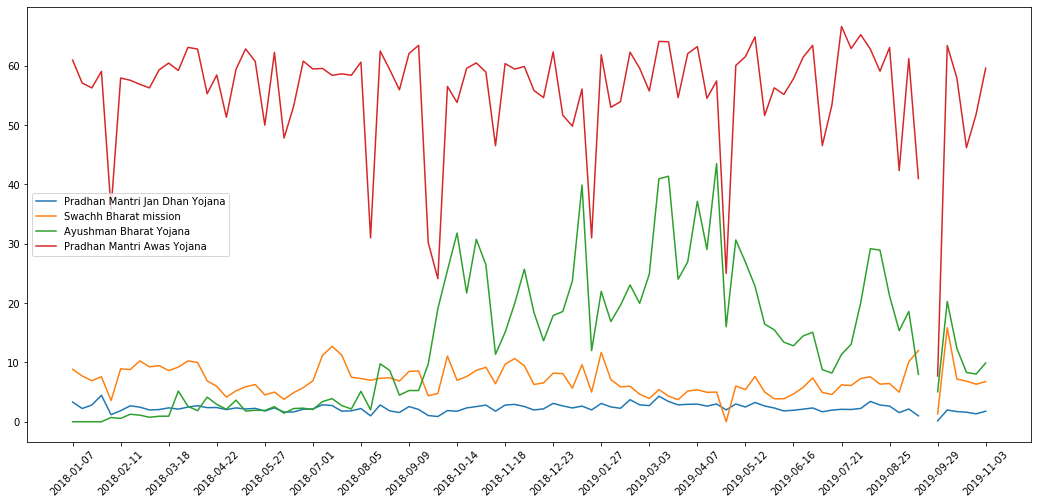

In [55]:
x = df2_g['date']

xticks = [tick for tick in x[::5]]
# xticks.append(x[len(x)-1])
plt.figure(figsize=(18,8))
for col in df2_g.columns[1:-1]:
    plt.plot(x, df2_g[col], label=col)
plt.xticks(xticks, rotation="45")
plt.legend()
plt.show()

In [9]:
df1 = pd.read_csv('data/schemes_01.csv')
df1.head()

,Week,jan_dhan,mudra_yojana,jeevan_jyoti_bima,ujjwala_yojana,sahaj_bijli_saubhagya
0,2018-01-07,36,24,20,26,12
1,2018-01-14,42,26,23,22,14
2,2018-01-21,56,30,16,29,15
3,2018-01-28,49,41,36,40,16
4,2018-02-04,38,41,25,31,13


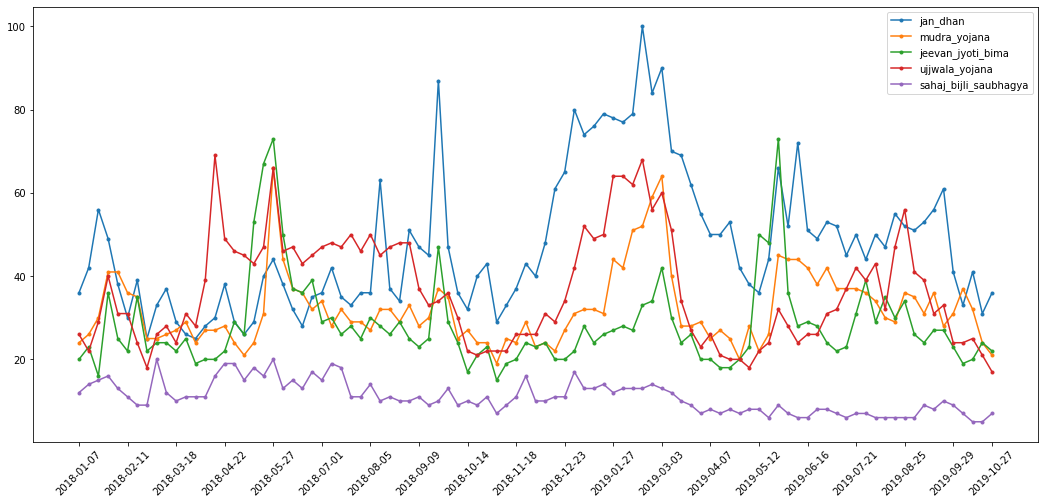

In [37]:
x = df1['Week']

xticks = [tick for tick in x[::5]]
xticks.append(x[len(x)-1])
plt.figure(figsize=(18,8))
for col in df1.columns[1:]:
    plt.plot(x, df1[col], '.-', label=col)
plt.xticks(xticks, rotation="45")
plt.legend()
plt.show()
# plt.savefig('data/high_search.png')